# **Regression - Targets**
---

## 1. Installing and Importing Libraries

In [ ]:
# Install pycaret (if not already installed)
# Uncomment the following line if pycaret is not installed:
# !pip install pycaret[full]

# Import necessary libraries
import pandas as pd
import numpy as np
from pycaret.regression import *
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Loading Dataset

In [ ]:
file_path = "Fuel_cell_performance_data-Full.csv"  # Ensure this file is in the root directory
data = pd.read_csv(file_path)

# Ensure only features F1-F15 are used for training
features = data.drop(columns=['Target1', 'Target2', 'Target3', 'Target4', 'Target5'])
data = pd.concat([features, data[['Target5']]], axis=1)
data.head()


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Target5
0,52.9,1.33,49.1,37.13,129.43,35.0,0.281,112.7,207,0.55,98.971,2.87,1362,15.9,429,33.29
1,87.6,2.12,48.8,42.10,171.07,37.6,0.153,157.4,188,0.86,101.179,2.34,5130,26.1,1819,34.50
2,73.3,2.72,93.8,20.11,163.69,44.3,0.367,348.7,270,1.87,98.919,2.13,7811,16.7,1763,129.28
3,65.6,2.58,48.1,35.11,63.37,32.5,0.279,321.2,322,1.75,101.560,2.91,1641,32.1,203,186.65
4,39.6,2.58,49.3,32.93,63.40,47.0,0.149,205.6,203,1.55,98.148,1.93,7648,27.5,276,52.32


## 3. Setup and Comparing Models

In [ ]:
# Set up PyCaret regression environment
regression_experiment = RegressionExperiment()

# Setup with Preprocessing and Splitting
preprocessed_setup = regression_experiment.setup(
    data=data,
    target="Target5",
    session_id=42,
    train_size=0.7,  # Use 70% for training
    preprocess=True,
    remove_outliers=True,
    normalize=True,
    transformation=True
)

# Compare models again with preprocessing applied
model_comparison_preprocessed = regression_experiment.compare_models(sort="R2")


,Description,Value
0,Session id,42
1,Target,Target5
2,Target type,Regression
3,Original data shape,"(1000, 16)"
4,Transformed data shape,"(965, 16)"
5,Transformed train set shape,"(665, 16)"
6,Transformed test set shape,"(300, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,13.9411,401.5837,19.9781,0.7884,0.3391,0.3126,6.1230
et,Extra Trees Regressor,14.9582,442.1941,20.8965,0.7684,0.3610,0.3589,0.7920
lightgbm,Light Gradient Boosting Machine,15.1744,465.2741,21.4976,0.7553,0.3701,0.3467,0.6860
gbr,Gradient Boosting Regressor,15.1076,461.4981,21.3990,0.7551,0.3884,0.3495,0.5190
rf,Random Forest Regressor,15.8299,476.6257,21.7717,0.7475,0.3821,0.3846,0.8920
xgboost,Extreme Gradient Boosting,15.7775,486.0736,21.9778,0.7408,0.3842,0.3761,0.9060
llar,Lasso Least Angle Regression,16.9916,530.9862,22.8668,0.7244,0.4826,0.5199,0.2420
lasso,Lasso Regression,16.9916,530.9862,22.8668,0.7244,0.4826,0.5199,0.2390
br,Bayesian Ridge,17.3052,532.0836,22.8901,0.7234,0.5275,0.5580,0.4250
ridge,Ridge Regression,17.3391,532.0330,22.8918,0.7233,0.5358,0.5636,0.4030


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

## 4. Result Analysis for Top Models

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top models
top_models = [
    "catboost",
    "et",  # Extra Trees
    "lightgbm",  # Light GBM
    "gbr",  # Gradient Boosting
    "rf"  # Random Forest
]

trained_models = {}

# Train each model and store it
for model_name in top_models:
    # Create and train the model
    trained_models[model_name] = regression_experiment.create_model(model_name)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,13.9968,436.9519,20.9034,0.7838,0.3408,0.2980
1,14.5413,420.5937,20.5084,0.8455,0.3484,0.3306
2,12.3542,299.4149,17.3036,0.7986,0.3309,0.2511
3,14.7821,439.2061,20.9572,0.7653,0.3324,0.3184
4,11.8402,325.0242,18.0284,0.8071,0.3250,0.3024
5,15.0418,414.9327,20.3699,0.7895,0.3155,0.2917
6,13.5689,401.7562,20.0439,0.7839,0.3138,0.2893
7,13.9161,390.6385,19.7646,0.8056,0.3799,0.3594
8,13.6712,352.6311,18.7785,0.7573,0.3808,0.3882


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,14.7886,488.0367,22.0916,0.7586,0.3376,0.3196
1,14.7577,456.8474,21.3740,0.8322,0.3578,0.3567
2,14.5509,349.1575,18.6858,0.7651,0.3380,0.3101
3,15.7564,467.0485,21.6113,0.7504,0.3540,0.3520
4,13.3775,341.5751,18.4817,0.7973,0.4174,0.4394
5,16.2537,466.3036,21.5941,0.7634,0.3360,0.3333
6,13.6543,402.6748,20.0668,0.7834,0.3582,0.3408
7,15.0110,413.6815,20.3392,0.7941,0.3808,0.3978
8,13.6896,326.8628,18.0793,0.7750,0.3820,0.3992


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,14.8416,481.9578,21.9535,0.7616,0.3978,0.3276
1,15.4798,538.6206,23.2082,0.8021,0.3986,0.3777
2,14.7429,386.6248,19.6628,0.7399,0.3657,0.2843
3,16.4645,531.8622,23.0621,0.7158,0.3679,0.3666
4,12.6522,384.6358,19.6121,0.7717,0.3590,0.3470
5,15.8979,451.1218,21.2396,0.7711,0.3460,0.3201
6,14.0944,411.1748,20.2774,0.7788,0.3467,0.3312
7,15.5364,438.6448,20.9438,0.7817,0.3963,0.3946
8,14.6286,391.2436,19.7799,0.7307,0.3851,0.3976


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,14.9592,473.8271,21.7676,0.7656,0.4004,0.3362
1,14.8479,420.1061,20.4965,0.8457,0.3668,0.3404
2,14.2322,318.5214,17.8472,0.7857,0.3859,0.3030
3,16.3055,553.9137,23.5354,0.7040,0.3777,0.3619
4,13.8447,454.9060,21.3285,0.7300,0.3775,0.3764
5,16.0619,539.4316,23.2257,0.7263,0.4540,0.3336
6,13.7986,399.6414,19.9910,0.7850,0.3504,0.3028
7,14.5468,411.9892,20.2975,0.7950,0.4362,0.4153
8,15.9798,433.2224,20.8140,0.7018,0.4243,0.4310


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,15.2871,514.6091,22.6850,0.7454,0.3568,0.3387
1,15.8009,475.6301,21.8089,0.8253,0.3777,0.3806
2,16.8616,439.1943,20.9570,0.7045,0.3741,0.3508
3,16.5214,554.7710,23.5536,0.7035,0.3709,0.3681
4,13.5095,372.9410,19.3117,0.7786,0.4356,0.4613
5,16.6224,482.4486,21.9647,0.7552,0.3583,0.3476
6,15.2118,476.7601,21.8348,0.7435,0.3814,0.3763
7,15.8297,427.1921,20.6686,0.7874,0.4049,0.4290
8,15.6758,395.7669,19.8939,0.7276,0.4100,0.4494


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,14.8276,445.6451,21.1103,0.7811,0.3405,0.3106


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,15.0291,477.9528,21.8621,0.7653,0.3507,0.3447


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,15.2411,500.1899,22.3649,0.7544,0.3422,0.3241


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,15.7206,475.6493,21.8094,0.7664,0.3701,0.3516


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,15.0386,462.2701,21.5005,0.7730,0.3551,0.3500


### Visualisation Graphs

Using Model - catboost


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,14.8276,445.6451,21.1103,0.7811,0.3405,0.3106


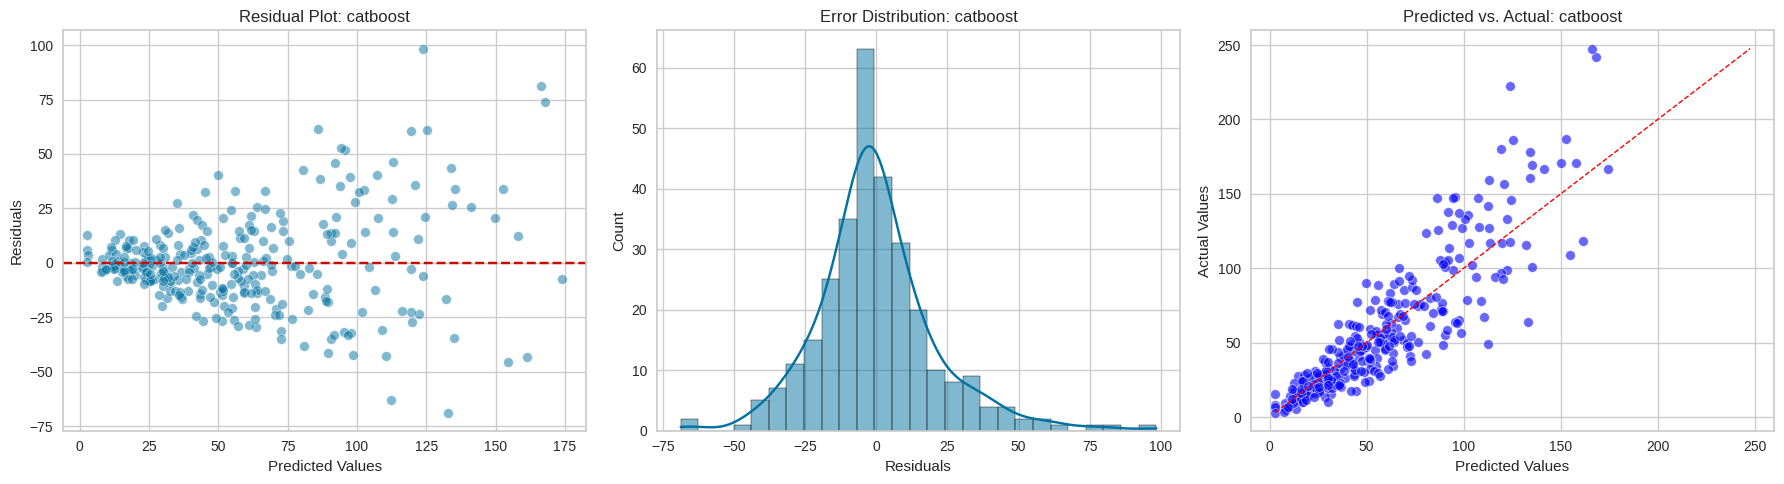




Using Model - et


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,15.0291,477.9528,21.8621,0.7653,0.3507,0.3447


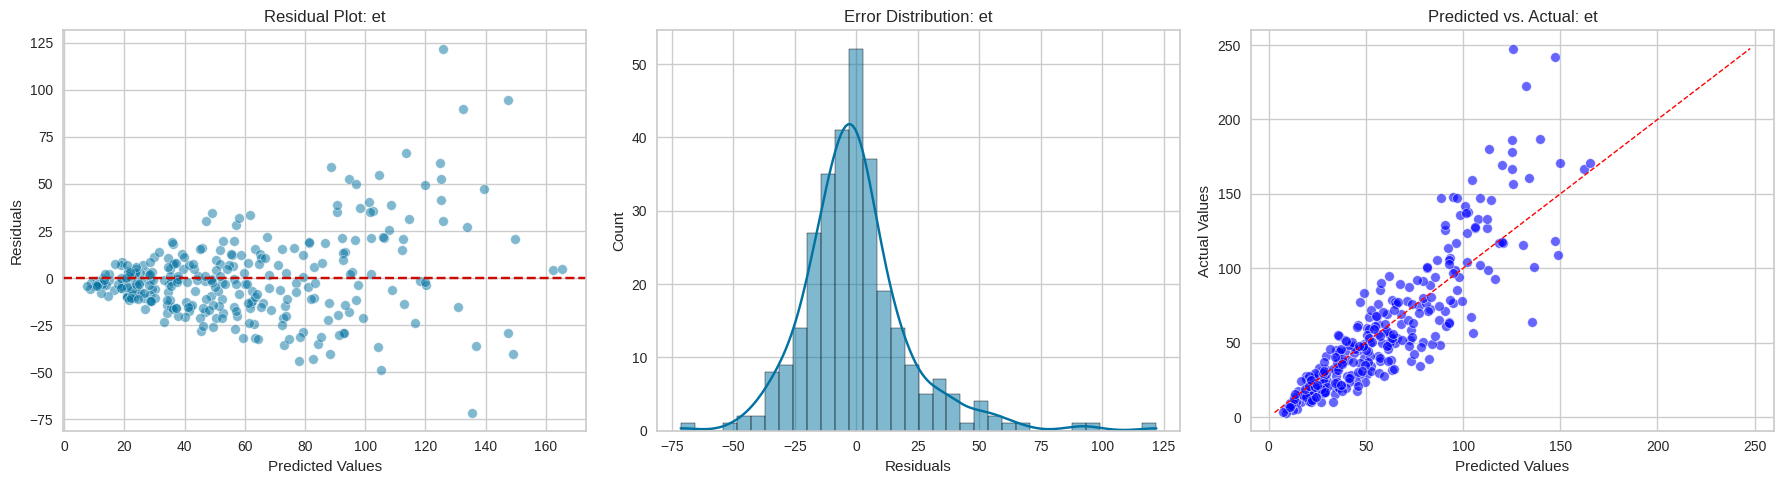




Using Model - lightgbm


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,15.2411,500.1899,22.3649,0.7544,0.3422,0.3241


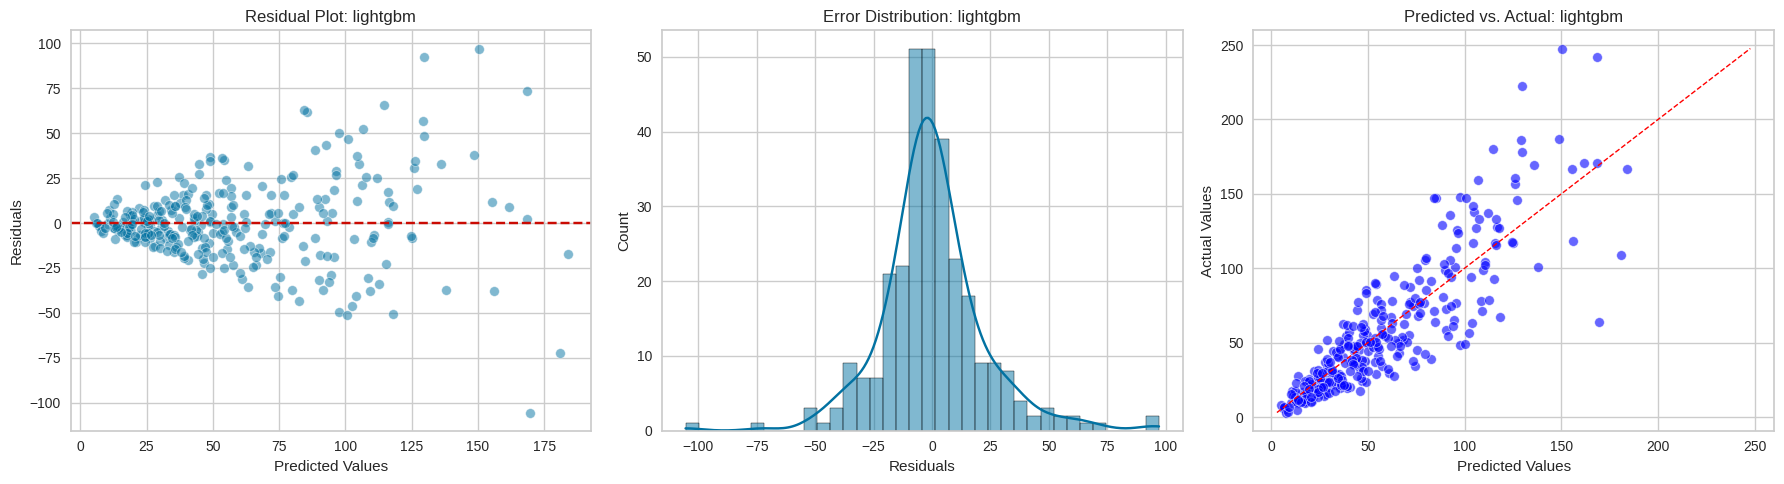




Using Model - gbr


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,15.7206,475.6493,21.8094,0.7664,0.3701,0.3516


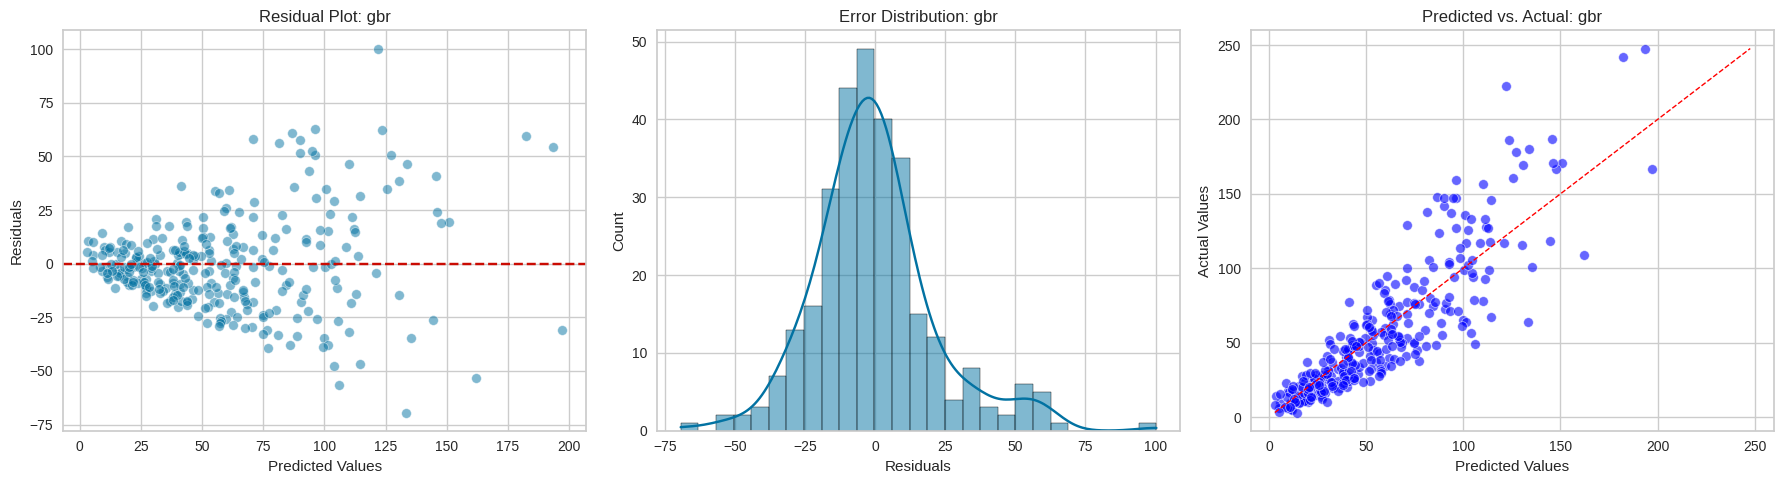




Using Model - rf


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,15.0386,462.2701,21.5005,0.7730,0.3551,0.3500


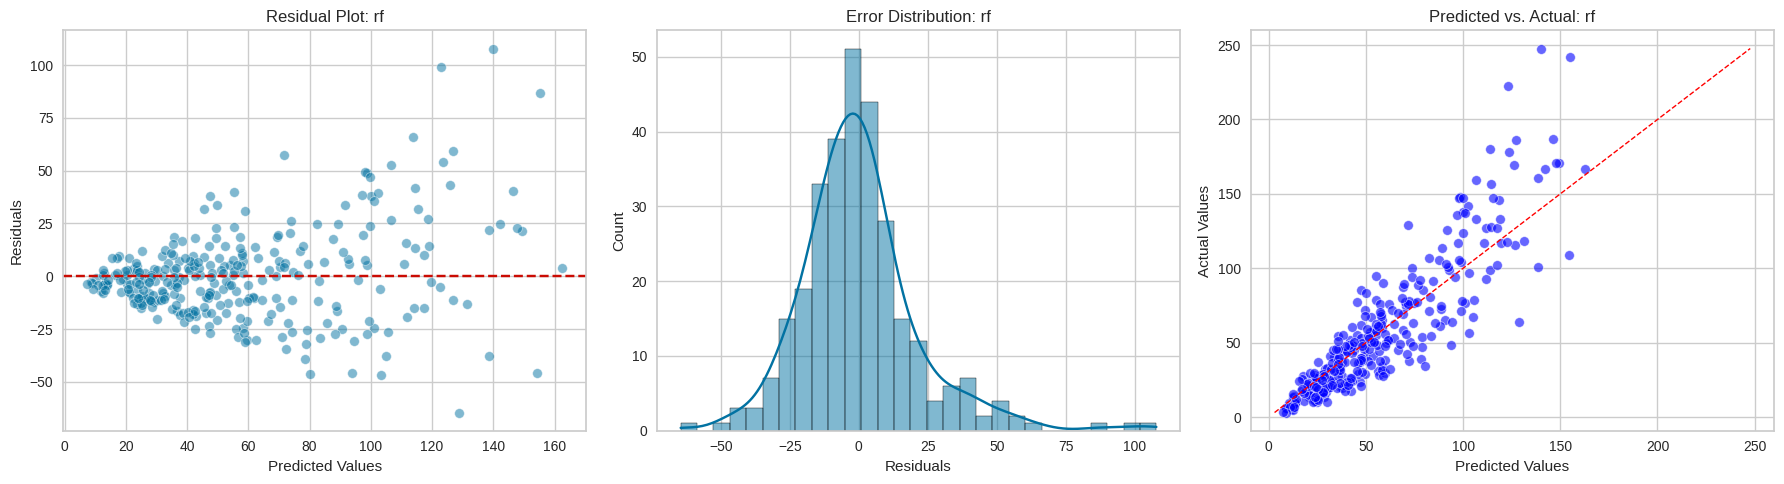

In [ ]:
# Residuals, Error Distribution, and Predicted vs Actual Plots
for model_name, model in trained_models.items():
    print("Using Model -",model_name)
    prediction_result = regression_experiment.predict_model(model)
    residuals = prediction_result['Target5'] - prediction_result['prediction_label']

    # Create a figure with three subplots in a row
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

    # Predicted vs Actual Plot
    sns.scatterplot(ax=ax3,
                    x=prediction_result['prediction_label'],
                    y=prediction_result['Target5'],
                    alpha=0.6, color='blue')
    ax3.plot([prediction_result['Target5'].min(), prediction_result['Target5'].max()],
             [prediction_result['Target5'].min(), prediction_result['Target5'].max()],
             color='red', linestyle='--', linewidth=1)
    ax3.set_title(f'Predicted vs. Actual: {model_name}')
    ax3.set_xlabel('Predicted Values')
    ax3.set_ylabel('Actual Values')

    # Residual Plot
    sns.scatterplot(ax=ax1,
                    x=prediction_result['prediction_label'],
                    y=residuals,
                    alpha=0.5)
    ax1.axhline(y=0, color='r', linestyle='--')
    ax1.set_title(f'Residual Plot: {model_name}')
    ax1.set_xlabel('Predicted Values')
    ax1.set_ylabel('Residuals')

    # Error Distribution Plot
    sns.histplot(ax=ax2,
                 data=residuals,
                 kde=True)
    ax2.set_title(f'Error Distribution: {model_name}')
    ax2.set_xlabel('Residuals')
    ax2.set_ylabel('Count')


    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()  # Display the figure with all three plots
    plt.close()  # Close the figure to avoid overlap in subsequent iterations
    print("\n\n")

### Conclussion

In [ ]:
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error

# Placeholder to store error stats
error_stats = []

# Calculate error statistics and R² value for each model
for model_name, model in trained_models.items():
    prediction_result = regression_experiment.predict_model(model)

    # Extract true and predicted values (more readable)
    y_true = prediction_result['Target5']
    y_pred = prediction_result['prediction_label']

    # Calculate errors (using extracted variables)
    errors = y_true - y_pred

    # Calculate metrics
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)  # Use sklearn's MAE
    std_error = errors.std()
    max_error = abs(errors).max()
    median_error = abs(errors).median()

    # Error statistics (more concise)
    stats = {
        'Model': model_name,
        'R-squared': r2,  # Consistent naming
        'MAE': mae,  # Shortened for table readability
        'Std Dev of Error': std_error, # More descriptive
        'Max Abs Error': max_error, # More descriptive
        'Median Abs Error': median_error, # More descriptive
    }
    error_stats.append(stats)

# Create a DataFrame for the error statistics
error_stats_df = pd.DataFrame(error_stats)

# Sort the DataFrame by R² Value in descending order
error_stats_df_sorted = error_stats_df.sort_values(by='R-squared', ascending=False)

# Display the error statistics table sorted by R² Value (improved formatting)
print("\nModel Evaluation Metrics (Sorted by R-squared):")
print(error_stats_df_sorted.set_index('Model').round(4).to_string()) # Use set_index and to_string

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,14.8276,445.6451,21.1103,0.7811,0.3405,0.3106


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,15.0291,477.9528,21.8621,0.7653,0.3507,0.3447


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,15.2411,500.1899,22.3649,0.7544,0.3422,0.3241


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,15.7206,475.6493,21.8094,0.7664,0.3701,0.3516


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,15.0386,462.2701,21.5005,0.7730,0.3551,0.3500



Model Evaluation Metrics (Sorted by R-squared):
          R-squared      MAE  Std Dev of Error  Max Abs Error  Median Abs Error
Model                                                                          
catboost     0.7811  14.8276           21.1452        98.4383           10.1270
rf           0.7730  15.0386           21.5354       107.8291           10.2331
gbr          0.7664  15.7206           21.8442       100.2885           11.1736
et           0.7653  15.0291           21.8979       121.9464           10.7970
lightgbm     0.7544  15.2411           22.4019       105.4545            9.3029
